In [137]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy
from scipy import stats

In [126]:
spotify_df = pd.read_csv("data/clean/regional-us-weekly-enriched.csv")
spotify_df.head()

,Position,Track Name,Artist,Streams,URL,Week Start Date,Week End Date,Acousticness,Album,Danceability,...,Instrumentalness,Key,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,Time Signature,Valence
0,1,rockstar,Post Malone,10134471,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2017-12-29,2018-01-05,0.130000,rockstar,0.577,...,0.000090,5,0.1420,-6.594,0,28,0.0984,159.772,4,0.1190
1,2,No Limit,G-Eazy,7090891,https://open.spotify.com/track/2DQ1ITjI0YoLFzu...,2017-12-29,2018-01-05,0.011700,The Beautiful & Damned,0.838,...,0.000000,1,0.0853,-3.791,1,72,0.2440,175.957,4,0.4050
2,3,I Fall Apart,Post Malone,6673907,https://open.spotify.com/track/75ZvA4QfFiZvzhj...,2017-12-29,2018-01-05,0.068900,Stoney (Deluxe),0.556,...,0.000000,8,0.1960,-5.408,0,87,0.0382,143.950,4,0.2910
3,4,Bartier Cardi (feat. 21 Savage),Cardi B,6624198,https://open.spotify.com/track/75FDPwaULRdYDn4...,2017-12-29,2018-01-05,0.000704,Bartier Cardi (feat. 21 Savage),0.909,...,0.000823,8,0.3600,-7.513,1,66,0.1750,138.043,4,0.0986
4,5,Gucci Gang,Lil Pump,5975507,https://open.spotify.com/track/43ZyHQITOjhciSU...,2017-12-29,2018-01-05,0.239000,Lil Pump,0.936,...,0.000000,5,0.1170,-6.710,1,78,0.0597,119.889,4,0.6990


In [127]:
# Removing unecassary columns
spotify_df = spotify_df.drop(columns = ['URL','Track Name','Artist','Album','Week Start Date','Week End Date','Explicit','Image'])
spotify_df.head()

,Position,Streams,Acousticness,Danceability,Duration (ms),Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,Time Signature,Valence
0,1,10134471,0.130000,0.577,218320,0.522,0.000090,5,0.1420,-6.594,0,28,0.0984,159.772,4,0.1190
1,2,7090891,0.011700,0.838,245387,0.771,0.000000,1,0.0853,-3.791,1,72,0.2440,175.957,4,0.4050
2,3,6673907,0.068900,0.556,223347,0.538,0.000000,8,0.1960,-5.408,0,87,0.0382,143.950,4,0.2910
3,4,6624198,0.000704,0.909,224613,0.546,0.000823,8,0.3600,-7.513,1,66,0.1750,138.043,4,0.0986
4,5,5975507,0.239000,0.936,124056,0.523,0.000000,5,0.1170,-6.710,1,78,0.0597,119.889,4,0.6990


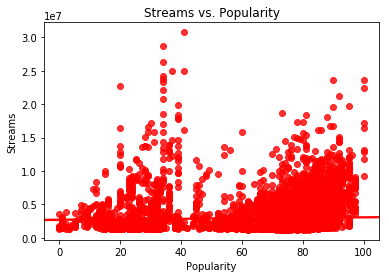

In [152]:
# Regression plot of Popularity vs Streams
h=sns.regplot(x="Popularity", y="Streams", data=spotify_df, ci=95, color = 'red').set_title('Streams vs. Popularity')

In [154]:
h.figure.savefig('Streams vs Popularity.png')

Text(0.5, 0.98, 'Popularity and Loudness vs Streams')

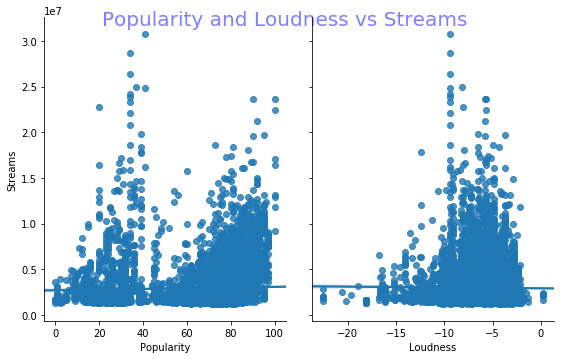

In [144]:
g = sns.pairplot(spotify_df, x_vars=['Popularity', 'Loudness'], y_vars=['Streams'],
             height=5, aspect=.8, kind="reg") 
g.fig.suptitle('Popularity and Loudness vs Streams', fontsize = 20, color = 'b', alpha =0.5)

In [151]:
g.savefig('Popularity and Loudness vs Streams.png')